# Building ANN Architecture to Handwritten Number Classification

### Installing Tensorflow

In [2]:
pip install tensorflow

### Importing the necessary libraries

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import struct

### Reading image data from dataset 

In [4]:
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        #reading the magic number, number of images and the number of rows and columns
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))

            #converting the data into an array
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    #returning the array
    return images

### Reading label data from dataset

In [5]:
def load_mnist_labels(file_path):
    
    with open(file_path, 'rb') as f:
            #reading the magic numbers and the number of labels
        magic, num_labels = struct.unpack(">II", f.read(8))
        
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    
    # Return the labels array
    return labels

### Dataset File Paths

In [12]:
train_images_path = r"C:\Users\HP\Downloads\archive\train-images.idx3-ubyte"
train_labels_path = r"C:\Users\HP\Downloads\archive\train-labels.idx1-ubyte"
test_images_path = r"C:\Users\HP\Downloads\archive\t10k-images.idx3-ubyte"
test_labels_path = r"C:\Users\HP\Downloads\archive\t10k-labels.idx1-ubyte"


### Loading the dataset

In [13]:
x_train = load_mnist_images(train_images_path)  
y_train = load_mnist_labels(train_labels_path) 
x_test = load_mnist_images(test_images_path)   
y_test = load_mnist_labels(test_labels_path)    

### Normalizing the Dataset

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
#adding greyscale channel to the images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


### Applying one hot encoding

In [16]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Data Augumentation

In [17]:
# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,             
    width_shift_range=0.1,         
    height_shift_range=0.1,      
    zoom_range=0.1              
)

### Building the model

In [18]:
model = Sequential()
#flattening the images to one dimensional array 
model.add(Flatten(input_shape=(28, 28, 1))) 
model.add(Dense(128, activation='relu'))    
model.add(Dense(128, activation='relu'))     
model.add(Dense(10, activation='softmax'))   


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [19]:
model.compile(optimizer='adam',               
              loss='categorical_crossentropy', 
              metrics=['accuracy'])           

### Training the model

In [20]:
# Training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,                  
                    validation_data=(x_test, y_test))  


model.save('trained_model.h5')


Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 27ms/step - accuracy: 0.7603 - loss: 0.7513 - val_accuracy: 0.9569 - val_loss: 0.1347
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9315 - loss: 0.2211 - val_accuracy: 0.9682 - val_loss: 0.0999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9461 - loss: 0.1808 - val_accuracy: 0.9714 - val_loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9496 - loss: 0.1610 - val_accuracy: 0.9732 - val_loss: 0.0878
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9586 - loss: 0.1350 - val_accuracy: 0.9754 - val_loss: 0.0754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9599 - loss: 0.1308 - val_accuracy: 0.9773 - val_loss: 0.0664
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9643 - loss: 0.1191 - val_accuracy: 0.9786 - val_loss: 0.0666
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9645 - loss: 0.11

### Evaluating the model 

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9818 - loss: 0.0544
Test accuracy: 0.9834


### Visualizing and plotting subplots

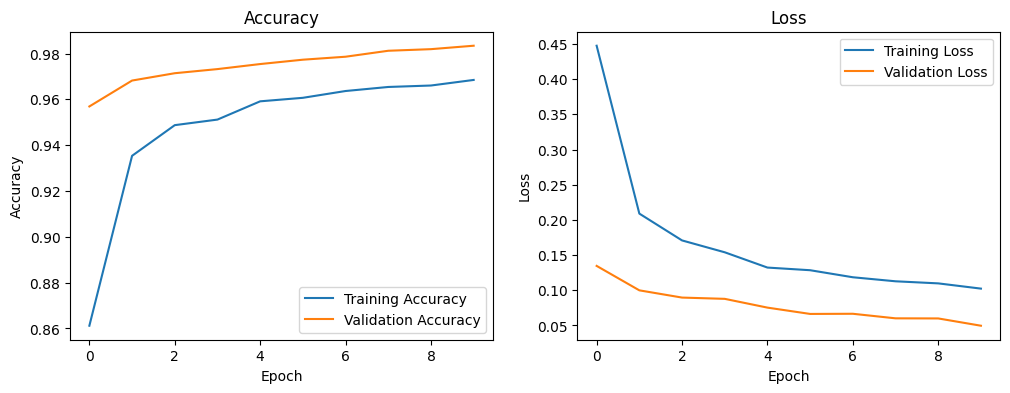

In [22]:

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')         
plt.ylabel('Accuracy')       
plt.legend()                 
plt.title('Accuracy')        

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')         
plt.ylabel('Loss')         
plt.legend()               
plt.title('Loss')            

plt.show() 